# Introducción y Análisis

In [3]:
# Librerias
import numpy as np
import keras
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Input, Embedding, Flatten
from keras.models import Sequential
from keras.layers import Flatten
import keras_tuner
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize



Se leen los datos del .csv

In [92]:
#Inicializar y abrir archivo
corpus=[]
dic_diag={}
dic_proc={}
dic_grd={}
archivo=open("dataset_elpino.csv",encoding="utf-8")

#Sacar las variables (features o característica)
header=archivo.readline().strip().split(";")
features=[]
for col in header:
    if col.startswith("Diag") or col.startswith("Proc"):
        col=col.split(" ")
        col=col[0]+col[1]
    features.append(col)

#Sacar la data (deja sólo los códigos en el corpus y en diccionario las descripciones)
for linea in archivo:
    row=[]
    linea=linea.strip().split(";")
    for i in range(len(linea)):
        cod=linea[i].split("-")[0].strip()
        if len(linea[i].split("-")) == 2:
            des=linea[i].split("-")[1].strip()
        if i < 35:
            dic_diag[cod]=des
        elif i < 65:
            dic_proc[cod]=des
        elif i == 67:
            dic_grd[cod]=des
        elif i==66:
            cod = 1 if cod=="Mujer" else 0
        row.append(cod)
    corpus.append(row)

#Crear un dataframe con la data
df = pd.DataFrame(corpus, columns=features)
df.head(20)

,Diag01,Diag02,Diag03,Diag04,Diag05,Diag06,Diag07,Diag08,Diag09,Diag10,...,Proced24,Proced25,Proced26,Proced27,Proced28,Proced29,Proced30,Edad en años,Sexo (Desc),GRD
0,A41.8,B37.6,I39.8,N10,B96.1,L89.9,L08.9,B96.2,A41.5,J86.9,...,99.84,88.72,90.42,90.52,91.39,91.33,87.03,40,0,184103
1,U07.1,J12.8,R06.0,R05,R50.9,Z29.0,Z01.7,J96.00,J94.2,J92.9,...,91.62,90.43,91.39,90.52,91.32,96.59,90.99,53,0,041013
2,K56.5,R57.2,R57.1,J80,Y95,J15.0,U82.2,B95.6,B96.8,B37.1,...,99.84,91.73,90.53,99.26,89.39,89.66,89.65,65,0,041013
3,K76.8,K66.1,N18.5,D64.9,E87.5,E87.2,J81,N17.8,J44.9,R41.0,...,57.94,00.13,00.17,99.04,99.18,99.21,99.23,61,0,041023
4,T81.0,Y83.2,S31.1,S36.80,W31.62,J96.09,J15.0,U82.2,U07.1,N39.0,...,90.52,91.39,91.32,93.90,99.15,96.59,45.13,30,0,041023
5,U07.1,J12.8,R06.0,R50.9,R53,R05,Z29.0,Z01.7,J96.00,J80,...,57.94,00.17,89.39,96.6,99.26,91.82,90.99,49,1,041013
6,U07.1,J12.8,R06.0,R05,Z29.0,Z01.7,J96.09,J80,J15.1,A41.8,...,91.32,99.18,93.94,99.21,00.17,99.29,99.19,55,0,041013
7,U07.1,J12.8,J96.09,J80,R06.0,R50.9,R05,M79.19,Z29.0,Z01.7,...,99.17,99.18,99.19,99.21,99.23,99.26,99.29,33,1,041013
8,U07.1,J12.8,J80,Z20.8,Z29.0,Z01.7,T81.4,Y83.6,K85.9,K65.0,...,99.04,99.18,99.19,99.21,99.26,99.29,93.01,37,1,041023
9,U07.1,J12.8,J96.00,R50.9,R11,R05,M79.19,R07.0,A09.9,Z29.0,...,99.26,99.29,93.01,93.09,93.11,93.12,93.13,59,0,041023


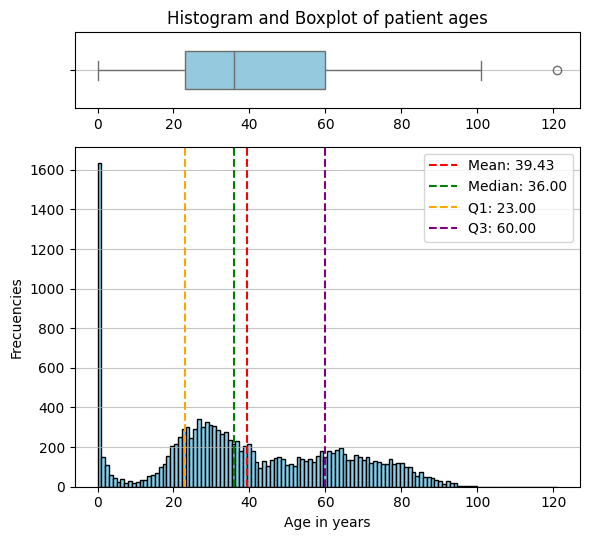

In [93]:
# Calcular estadísticas
q1 = df['Edad en años'].astype(int).quantile(0.25)
q3 = df['Edad en años'].astype(int).quantile(0.75)
iqr = q3 - q1
media = df['Edad en años'].astype(int).mean()
mediana = df['Edad en años'].astype(int).median()

# Crear una figura con subgráficos
fig, axes = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 4.5]}, figsize=(6, 5.5))

# Diagrama de caja
sns.boxplot(x=df['Edad en años'].astype(int), showfliers=True, color='skyblue', ax=axes[0], width=0.5)
axes[0].set_title('Histogram and Boxplot of patient ages')
axes[0].grid(axis='y', alpha=0.75)
axes[0].set_xlabel('')

# Histograma
axes[1].hist([int(i) for i in df['Edad en años']], bins=120, color='skyblue', edgecolor='black')
axes[1].axvline(media, color='red', linestyle='--', label=f'Mean: {media:.2f}')
axes[1].axvline(mediana, color='green', linestyle='--', label=f'Median: {mediana:.2f}')
axes[1].axvline(q1, color='orange', linestyle='--', label=f'Q1: {q1:.2f}')
axes[1].axvline(q3, color='purple', linestyle='--', label=f'Q3: {q3:.2f}')
axes[1]
axes[1].set_xlabel('Age in years')
axes[1].set_ylabel('Frecuencies')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.75)

# Ajustar el diseño
plt.tight_layout()
plt.show()

In [94]:
df = df[df['Edad en años'].astype(int) <= 120]

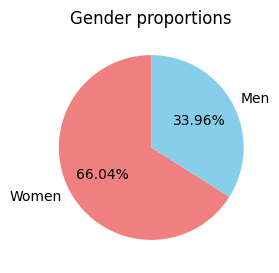

In [95]:
# Calcular la proporción de género
proporcion_genero = df['Sexo (Desc)'].value_counts(normalize=True) * 100

# Crear un gráfico de torta para la proporción de género
plt.figure(figsize=(3,3))
proporcion_genero.index = ['Women', 'Men']  # Cambiar las etiquetas
proporcion_genero.plot(kind='pie', autopct='%1.2f%%', colors=['lightcoral', 'skyblue'], startangle=90)
plt.title('Gender proportions')
plt.ylabel('')  # Eliminar la etiqueta del eje Y
plt.show()


<ipython-input-96-690d4bc437f1>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(clases_acumulado[clases_80], color='red', linestyle='--', label='80% of the instances')


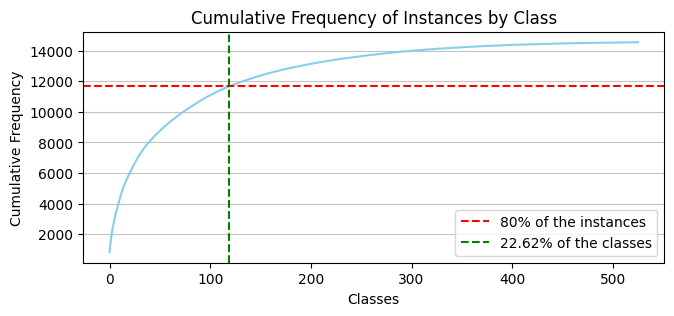

In [96]:
# Contar la cantidad de instancias por clase en la columna GRD
cantidad_por_clase = df['GRD'].value_counts()

# Calcular el porcentaje acumulado de instancias por clase
clases_acumulado = cantidad_por_clase.cumsum()

# Encontrar el número de clases necesarias para acumular el 80% de las instancias
clases_80 = (clases_acumulado  / cantidad_por_clase.sum() <= 0.8).sum()

# Crear el gráfico acumulativo
plt.figure(figsize=(7.5, 3))
plt.plot(clases_acumulado.values, color='skyblue')
plt.axhline(clases_acumulado[clases_80], color='red', linestyle='--', label='80% of the instances')
plt.axvline(clases_80, color='green', linestyle='--', label=f'{100*clases_80/len(cantidad_por_clase):.2f}% of the classes')
plt.title('Cumulative Frequency of Instances by Class')
plt.xlabel('Classes')
plt.ylabel('Cumulative Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

In [97]:
# Filtrar las clases con al menos 5 instancias
clases_con_suficientes_instancias = df['GRD'].value_counts()[df['GRD'].value_counts() >= 5].index
df = df[df['GRD'].isin(clases_con_suficientes_instancias)]

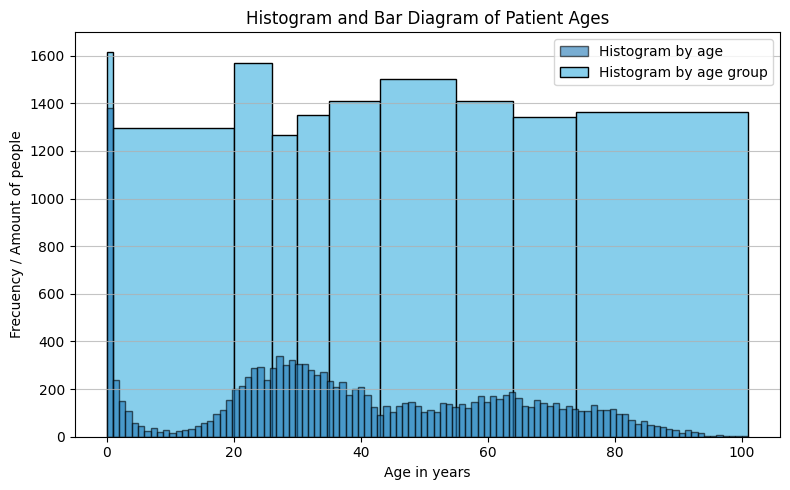

In [98]:
# Calcular los deciles
deciles = df['Edad en años'].astype(int).quantile([i / 10 for i in range(1, 10)])
decimo_decil = df['Edad en años'].astype(int).max()
deciles.loc[1.0] = decimo_decil
deciles.loc[0.0] = 0.0

# Crear los grupos etáreos con límites
df['Grupo Etáreo'] = pd.qcut(df['Edad en años'].astype(int), q=10, labels=[f'Grupo {i+1}' for i in range(10)])

# Contar la cantidad de personas en cada grupo etáreo y guardar los límites usando los deciles
conteo_grupos = df['Grupo Etáreo'].value_counts().sort_index()
limites_grupos = [(deciles.loc[i / 10], deciles.loc[(i + 1) / 10]) for i in range(10)]
conteo_grupos = pd.DataFrame({'Conteo': conteo_grupos, 'Límites': limites_grupos})

# Crear una figura
fig, ax = plt.subplots(figsize=(8, 5))

# Diagrama de barras con ancho ajustado
for i, (interval, row) in enumerate(conteo_grupos.iterrows()):
    start_age, end_age = row['Límites']
    width = end_age - start_age
    ax.bar(start_age, row['Conteo'], width=width, color='skyblue', edgecolor='black', align='edge', label='Histogram by age group' if i == 0 else "")

# Histograma
ax.hist([int(i) for i in df['Edad en años']], bins=df['Edad en años'].astype(int).max() + 1, edgecolor='black', alpha=0.6, label='Histogram by age')

# Configurar el gráfico
ax.set_title('Histogram and Bar Diagram of Patient Ages')
ax.set_xlabel('Age in years')
ax.set_ylabel('Frecuency / Amount of people')
ax.grid(axis='y', alpha=0.75)
ax.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [99]:
# Crear los grupos etáreos
df['Grupo Etáreo'] = pd.qcut(df['Edad en años'].astype(int), q=10, labels=[i for i in range(10)])
for i in df['Grupo Etáreo'].value_counts().keys():
    print(i, df['Grupo Etáreo'].value_counts()[i]/len(df)*100)
df = df.drop(columns=['Edad en años'], axis=1)

0 11.44049808971275
2 11.107966605348803
6 10.641007499646243
5 9.983019668883543
7 9.975944530918353
9 9.657563322484789
4 9.558511390972125
8 9.508985425215792
1 9.169378802886657
3 8.957124663930946


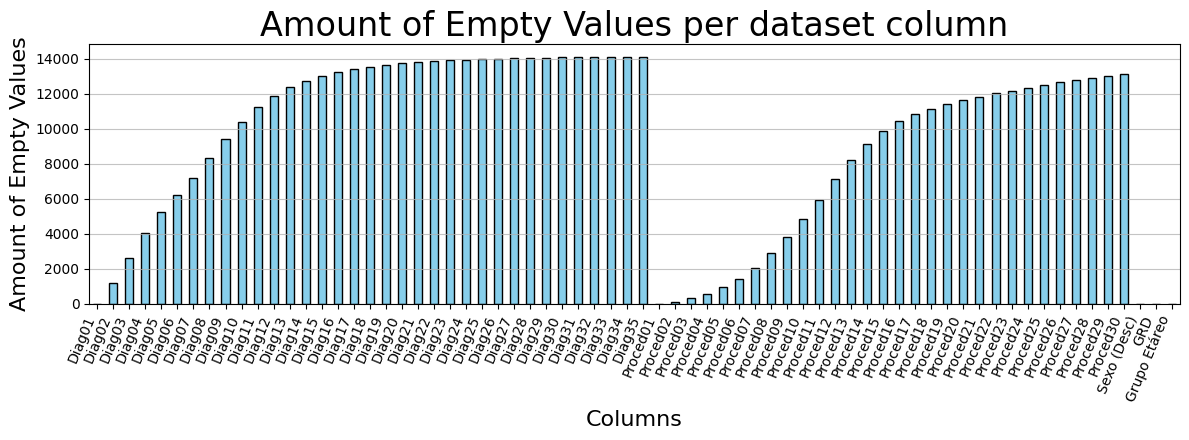

In [100]:
# Calcular la cantidad de valores '' en las primeras 65 columnas
valores_vacios_str = (df.iloc[:, :] == '').sum()

# Crear el gráfico de barras
plt.figure(figsize=(12, 4.5))
valores_vacios_str.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Amount of Empty Values per dataset column', fontsize=24)
plt.xticks(rotation=22.5+45, ha='right')
plt.xlabel('Columns', fontsize=16)
plt.ylabel('Amount of Empty Values', fontsize=16)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# Otros modelos

In [101]:
for column in df.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

X = df.drop(columns=['GRD'])
y = df['GRD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Regresión Logística

In [102]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

for solver in solvers:
    print("\nEntrenando modelo de Regresión Logística con solver", solver)
    logistic_model = LogisticRegression(
        max_iter=10, # Sólo 10 iteraciones porque con 100 estuvo más de una hora y no dio :/
        random_state=42,
        solver=solver
    )
    logistic_model.fit(X_train, y_train)
    y_pred_logistic = logistic_model.predict(X_test)
    print("Resultados de Regresión Logística:")
    print("     Accuracy:", accuracy_score(y_test, y_pred_logistic))
    print('     Precision:', precision_score(y_test, y_pred_logistic, average='weighted'))
    print('     Recall:', recall_score(y_test, y_pred_logistic, average='weighted'))
    print('     F1 Score:', f1_score(y_test, y_pred_logistic, average='weighted'))


Entrenando modelo de Regresión Logística con solver lbfgs


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Resultados de Regresión Logística:
     Accuracy: 0.14962858153519631
     Precision: 0.05740851166478206
     Recall: 0.14962858153519631
     F1 Score: 0.07890092303315017

Entrenando modelo de Regresión Logística con solver liblinear


KeyboardInterrupt: 

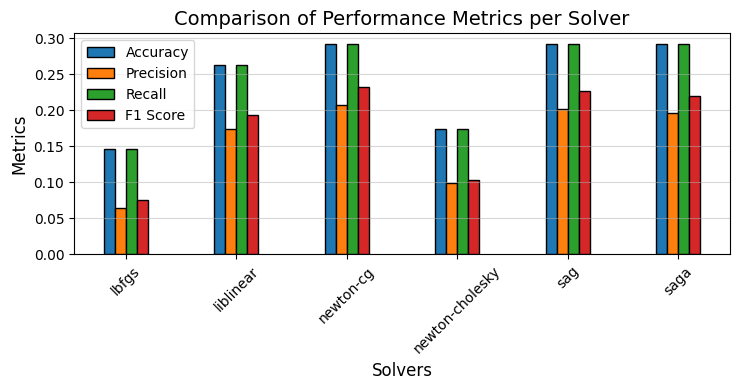

Máximos de Logistic Regression:
     Accuracy:  0.2922
     Precision: 0.2074
     Recall:    0.2922
     F1 Score:  0.2318


In [104]:
# Se ingresan manualmente los resultados de los modelos aquí por falta de tiempo, disculpas :/
accuracies = [0.14609126282278034, 0.26353024407499115, 0.2921825256455607,  0.17474354439334985, 0.2918287937743191,  0.2918287937743191 ]
precisions = [0.06412400244874028, 0.1740719611402245,  0.20741501995725517, 0.09975526028754823, 0.20113981741556664, 0.19585371236118773]
recalls =    [0.14609126282278034, 0.26353024407499115, 0.2921825256455607 , 0.17474354439334985, 0.2918287937743191,  0.2918287937743191 ]
f1_scores =  [0.07593218173044855, 0.19321956207454585, 0.2318244500684546 , 0.10302636562228128, 0.22658267163396903, 0.219509092833085  ]

x = np.arange(len(solvers))
width = 0.1

plt.figure(figsize=(7.5, 4))
plt.bar(x - 1.5 * width, accuracies, width, label='Accuracy', edgecolor='black')
plt.bar(x - 0.5 * width, precisions, width, label='Precision', edgecolor='black')
plt.bar(x + 0.5 * width, recalls, width, label='Recall', edgecolor='black')
plt.bar(x + 1.5 * width, f1_scores, width, label='F1 Score', edgecolor='black')

plt.xticks(x, solvers, rotation=45)
plt.xlabel('Solvers', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Comparison of Performance Metrics per Solver', fontsize=14)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

maximos = [max(accuracies), precisions[accuracies.index(max(accuracies))], recalls[accuracies.index(max(accuracies))], f1_scores[accuracies.index(max(accuracies))]]
print("Máximos de Logistic Regression:")
print("     Accuracy: ", round(maximos[0],4))
print("     Precision:", round(maximos[1],4))
print("     Recall:   ", round(maximos[2],4))
print("     F1 Score: ", round(maximos[3],4))

## Arbol de Decisión

In [105]:
depths = list(range(1, 31))
accuracies = []
precisions = []
recalls = []
f1_scores = []

for i in depths:
    decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=i)
    decision_tree_model.fit(X_train, y_train)
    y_pred_tree = decision_tree_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_tree))
    precisions.append(precision_score(y_test, y_pred_tree, average='weighted', zero_division=0))
    recalls.append(recall_score(y_test, y_pred_tree, average='weighted', zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_tree, average='weighted', zero_division=0))

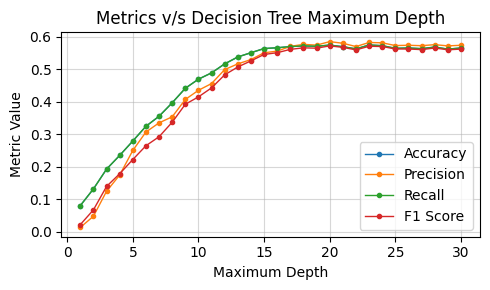

Máximos de Decision Tree:
     Accuracy:  0.5741
     Precision: 0.5818
     Recall:    0.5741
     F1 Score:  0.5702


In [106]:
plt.figure(figsize=(5, 3))
plt.plot(depths, accuracies, label='Accuracy', marker='o', ms=3, lw=1)
plt.plot(depths, precisions, label='Precision', marker='o', ms=3, lw=1)
plt.plot(depths, recalls, label='Recall', marker='o', ms=3, lw=1)
plt.plot(depths, f1_scores, label='F1 Score', marker='o', ms=3, lw=1)

plt.title('Metrics v/s Decision Tree Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

maximos = [max(accuracies), precisions[accuracies.index(max(accuracies))], recalls[accuracies.index(max(accuracies))], f1_scores[accuracies.index(max(accuracies))]]
print("Máximos de Decision Tree:")
print("     Accuracy: ", round(maximos[0],4))
print("     Precision:", round(maximos[1],4))
print("     Recall:   ", round(maximos[2],4))
print("     F1 Score: ", round(maximos[3],4))

## Random Forest

In [107]:
estimators = list(range(10, 110, 10))
accuracies = []
precisions = []
recalls = []
f1_scores = []

for i in estimators:
    print("\nEntrenando modelo de Random Forest con", i, "estimadores")
    random_forest_model = RandomForestClassifier(n_estimators=i, random_state=42, max_depth=18)
    random_forest_model.fit(X_train, y_train)
    y_pred_forest = random_forest_model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_forest))
    precisions.append(precision_score(y_test, y_pred_forest, average='weighted', zero_division=0))
    recalls.append(recall_score(y_test, y_pred_forest, average='weighted', zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_forest, average='weighted', zero_division=0))


Entrenando modelo de Random Forest con 10 estimadores

Entrenando modelo de Random Forest con 20 estimadores

Entrenando modelo de Random Forest con 30 estimadores

Entrenando modelo de Random Forest con 40 estimadores

Entrenando modelo de Random Forest con 50 estimadores

Entrenando modelo de Random Forest con 60 estimadores

Entrenando modelo de Random Forest con 70 estimadores

Entrenando modelo de Random Forest con 80 estimadores

Entrenando modelo de Random Forest con 90 estimadores

Entrenando modelo de Random Forest con 100 estimadores


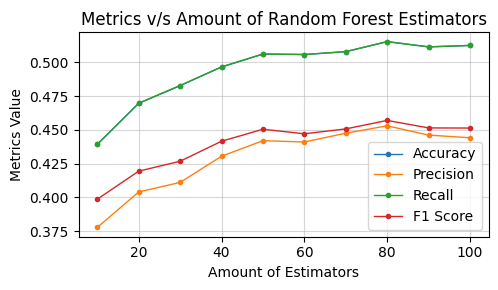

Máximos de Random Forest:
     Accuracy:  0.5154
     Precision: 0.4531
     Recall:    0.5154
     F1 Score:  0.457


In [108]:
plt.figure(figsize=(5, 3))
plt.plot(estimators, accuracies, label='Accuracy', marker='o', ms=3, lw=1)
plt.plot(estimators, precisions, label='Precision', marker='o', ms=3, lw=1)
plt.plot(estimators, recalls, label='Recall', marker='o', ms=3, lw=1)
plt.plot(estimators, f1_scores, label='F1 Score', marker='o', ms=3, lw=1)

plt.title('Metrics v/s Amount of Random Forest Estimators')
plt.xlabel('Amount of Estimators')
plt.ylabel('Metrics Value')
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

maximos = [max(accuracies), precisions[accuracies.index(max(accuracies))], recalls[accuracies.index(max(accuracies))], f1_scores[accuracies.index(max(accuracies))]]
print("Máximos de Random Forest:")
print("     Accuracy: ", round(maximos[0],4))
print("     Precision:", round(maximos[1],4))
print("     Recall:   ", round(maximos[2],4))
print("     F1 Score: ", round(maximos[3],4))

# Redes Neuronales

In [15]:
seed = 12122008
X = []
Y = []

le = LabelEncoder()
for column in df.columns[:-1]:
    df[column] = le.fit_transform(df[column].astype(str))
X = df.iloc[:, :-1].values

ohe = OneHotEncoder(sparse_output=False)
Y = ohe.fit_transform(df['GRD'].values.reshape(-1, 1))

In [120]:
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=seed, stratify=Y)

### Sin Embedding

In [53]:
def build_model(hp):
    modelo = Sequential()
    modelo.add(Input(shape=(X.shape[1],)))
    for i in range(hp.Choice("capas", [1, 2, 3])):
        modelo.add(Dense(hp.Choice("neuronas_capa", [8, 16, 32, 64]), activation="relu"))
    modelo.add(Dense(y_train.shape[1], activation="softmax"))
    modelo.compile(
        loss="categorical_crossentropy",
        metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")],
        optimizer="adam"
    )
    return modelo

tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_acc",direction="max"),
    max_trials=16,
    executions_per_trial=1,
    overwrite=True,
    directory="modelos",
    project_name="GRD"
)

In [54]:
tuner.search(x_train,y_train,epochs=16,validation_data=(x_val,y_val),batch_size=32,verbose=1)

Trial 12 Complete [00h 00m 22s]
val_acc: 0.19915103912353516

Best val_acc So Far: 0.3367527425289154
Total elapsed time: 00h 04m 40s


In [55]:
mejor_modelo=tuner.get_best_models()[0]
mejor_modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 327)            │        21,255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,927 (132.53 KB)

 Trainable params: 33,927 (132.53 KB)

 Non-trainable params: 0 (0.00 B)

In [126]:
modelo=Sequential()
modelo.add(Input(shape=(X.shape[1],)))
modelo.add(Dense(64))
modelo.add(Dense(64))
modelo.add(Dense(64))
modelo.add(Dense(Y.shape[1],activation="softmax"))
modelo.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["acc"])
modelo.fit(x_train, y_train, epochs=16, batch_size=32, verbose=2)

Epoch 1/16
354/354 - 2s - 6ms/step - acc: 0.1059 - loss: 37.2425
Epoch 2/16
354/354 - 1s - 4ms/step - acc: 0.1453 - loss: 8.7766
Epoch 3/16
354/354 - 1s - 3ms/step - acc: 0.1697 - loss: 5.9894
Epoch 4/16
354/354 - 1s - 4ms/step - acc: 0.1860 - loss: 4.9629
Epoch 5/16
354/354 - 1s - 3ms/step - acc: 0.2056 - loss: 4.3579
Epoch 6/16
354/354 - 1s - 2ms/step - acc: 0.2123 - loss: 4.0720
Epoch 7/16
354/354 - 1s - 4ms/step - acc: 0.2271 - loss: 3.8458
Epoch 8/16
354/354 - 1s - 2ms/step - acc: 0.2356 - loss: 3.7142
Epoch 9/16
354/354 - 1s - 4ms/step - acc: 0.2404 - loss: 3.6082
Epoch 10/16
354/354 - 1s - 4ms/step - acc: 0.2439 - loss: 3.5255
Epoch 11/16
354/354 - 1s - 4ms/step - acc: 0.2535 - loss: 3.4564
Epoch 12/16
354/354 - 1s - 3ms/step - acc: 0.2573 - loss: 3.4126
Epoch 13/16
354/354 - 1s - 2ms/step - acc: 0.2544 - loss: 3.3828
Epoch 14/16
354/354 - 2s - 4ms/step - acc: 0.2570 - loss: 3.3516
Epoch 15/16
354/354 - 1s - 3ms/step - acc: 0.2582 - loss: 3.3400
Epoch 16/16
354/354 - 1s - 3ms/st

In [129]:
y_pred_probs=modelo.predict(x_val)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[ 43 164 266 ... 137 292 208]


<ipython-input-130-008909247a0e>:54: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Rec=0.06 Acc=0.26 Pre=0.05


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


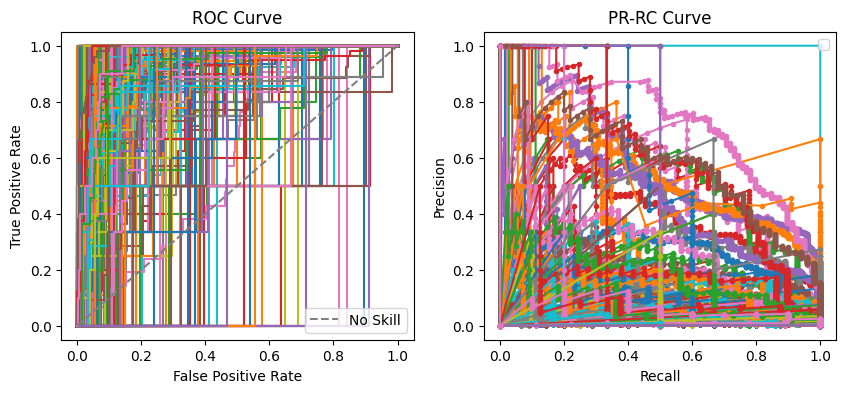

In [130]:
# Para multiclase, selecciona la clase con la mayor probabilidad
y_pred = np.argmax(y_pred_probs, axis=1)
y_val_classes = np.argmax(y_val, axis=1)  # Convertir one-hot encoding a clases

print(y_pred)

fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

roc_aucs = []

# # Matriz de confusión
# matriz = confusion_matrix(y_val_classes, y_pred)
# ax = axes[0]
# sns.heatmap(matriz, annot=True, ax=ax, cmap="Blues", fmt="d")
# ax.set_title("Rec=" + str(round(recall_score(y_val_classes, y_pred, average='macro'), 2)) +
#              " Acc=" + str(round(accuracy_score(y_val_classes, y_pred), 2)) +
#              " Pre=" + str(round(precision_score(y_val_classes, y_pred, average='macro'), 2)))
# axes[0].set_xlabel('Predicted')
# axes[0].set_ylabel('Real')

# ROC Curve (requiere binarización para multiclase)
y_val_binarized = label_binarize(y_val_classes, classes=range(len(np.unique(y_val_classes))))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_val_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve para cada clase
for i in range(len(roc_auc)):
    axes[0].plot(fpr[i], tpr[i])#, label=f'Class {i} (area = {roc_auc[i]:0.2f})')
axes[0].plot([0, 1], [0, 1], '--', label='No Skill')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()

# Precision-Recall Curve
lr_precision = {}
lr_recall = {}
pr_auc = {}
for i in range(y_val_binarized.shape[1]):
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(y_val_binarized[:, i], y_pred_probs[:, i])
    pr_auc[i] = auc(lr_recall[i], lr_precision[i])

# Plot Precision-Recall Curve para cada clase
for i in range(len(pr_auc)):
    axes[1].plot(lr_recall[i], lr_precision[i], marker='.')#, label=f'Class {i} (area = {pr_auc[i]:0.2f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('PR-RC Curve')
axes[1].legend()

print("Rec=" + str(round(recall_score(y_val_classes, y_pred, average='macro'), 2)) +
              " Acc=" + str(round(accuracy_score(y_val_classes, y_pred), 2)) +
              " Pre=" + str(round(precision_score(y_val_classes, y_pred, average='macro'), 2)))


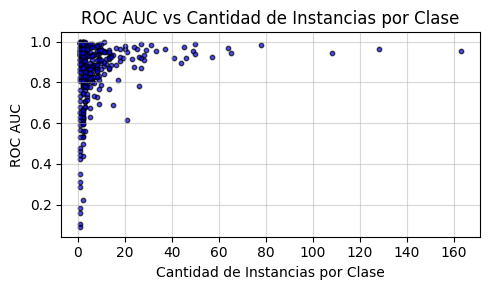

In [131]:
# Calcular la cantidad de instancias por clase
cantidad_instancias = np.sum(y_val_binarized, axis=0)

# Extraer los valores de roc_auc
roc_values = list(roc_auc.values())

# Crear el gráfico
plt.figure(figsize=(5, 3))
plt.scatter(cantidad_instancias, roc_values, color='blue', alpha=0.7, edgecolor='black', s=10)
plt.title('ROC AUC vs Cantidad de Instancias por Clase')
plt.xlabel('Cantidad de Instancias por Clase')
plt.ylabel('ROC AUC')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

El mejor modelo neuronal es el que tiene 3 capas ocultas de 64 neuronas

X_variable.shape: (14134, 1)
X_variable.shape: (14134, 2)
X_variable.shape: (14134, 3)
X_variable.shape: (14134, 4)
X_variable.shape: (14134, 5)
X_variable.shape: (14134, 6)
X_variable.shape: (14134, 7)
X_variable.shape: (14134, 8)
X_variable.shape: (14134, 9)
X_variable.shape: (14134, 10)
X_variable.shape: (14134, 11)
X_variable.shape: (14134, 12)
X_variable.shape: (14134, 13)
X_variable.shape: (14134, 14)
X_variable.shape: (14134, 15)
X_variable.shape: (14134, 16)
X_variable.shape: (14134, 17)
X_variable.shape: (14134, 18)
X_variable.shape: (14134, 19)
X_variable.shape: (14134, 20)
X_variable.shape: (14134, 21)
X_variable.shape: (14134, 22)
X_variable.shape: (14134, 23)
X_variable.shape: (14134, 24)
X_variable.shape: (14134, 25)
X_variable.shape: (14134, 26)
X_variable.shape: (14134, 27)
X_variable.shape: (14134, 28)
X_variable.shape: (14134, 29)
X_variable.shape: (14134, 30)
X_variable.shape: (14134, 31)
X_variable.shape: (14134, 32)
X_variable.shape: (14134, 33)
X_variable.shape: (

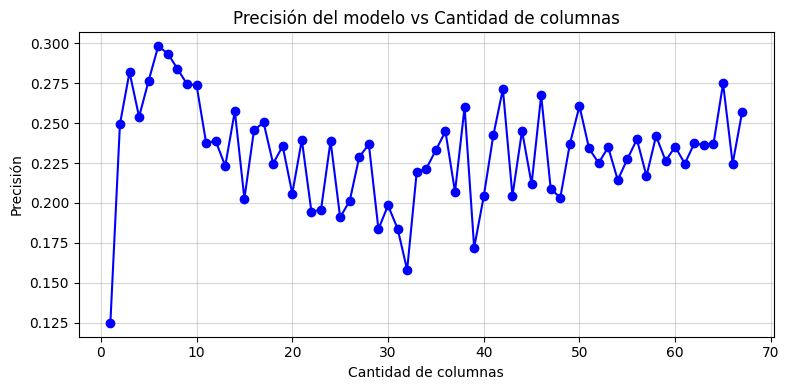

In [59]:
# Obtener las columnas sin valores vacíos
columnas_sin_vacios = valores_vacios_str[valores_vacios_str == 0].index.tolist()
columnas_sin_vacios.remove('GRD')

# Ordenar las columnas restantes por cantidad de valores vacíos
columnas_con_vacios = valores_vacios_str[valores_vacios_str > 0].sort_values().index.tolist()

# Combinar las columnas en el orden deseado
columnas_ordenadas = columnas_sin_vacios + columnas_con_vacios

# Evaluar el modelo con diferentes cantidades de columnas
resultados = []
for i in range(1, len(columnas_ordenadas) + 1):
    columnas_seleccionadas = columnas_ordenadas[:i]
    # Encode categorical data into numeric values
    X_variable = df[columnas_seleccionadas].apply(LabelEncoder().fit_transform).values
    print('X_variable.shape:', X_variable.shape)

    # Dividir los datos en entrenamiento y validación
    x_train_var, x_val_var, y_train_var, y_val_var = train_test_split(
        X_variable, Y, test_size=0.2, random_state=seed, stratify=Y
    )

    # Crear y entrenar el modelo
    modelo = Sequential()
    modelo.add(Input(shape=(x_train_var.shape[1],)))
    modelo.add(Dense(64, activation="relu"))
    modelo.add(Dense(64, activation="relu"))
    modelo.add(Dense(64, activation="relu"))
    modelo.add(Dense(Y.shape[1], activation="softmax"))
    modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    modelo.fit(x_train_var, y_train_var, epochs=10, batch_size=32, verbose=0)

    # Evaluar el modelo
    loss, accuracy = modelo.evaluate(x_val_var, y_val_var, verbose=0)
    resultados.append({"columnas": i, "accuracy": accuracy})

# Mostrar los resultados
resultados_df = pd.DataFrame(resultados)
print(resultados_df)

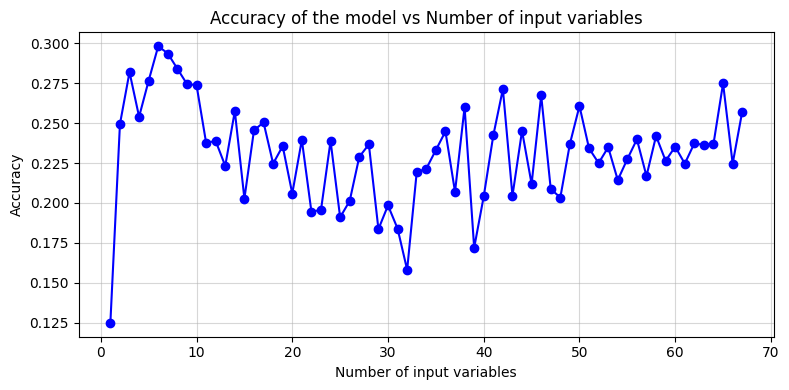

0.3


In [110]:
# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(resultados_df["columnas"], resultados_df["accuracy"], marker="o", color="blue")
plt.title("Accuracy of the model vs Number of input variables")
plt.xlabel("Number of input variables")
plt.ylabel("Accuracy")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
print(round(max(resultados_df["accuracy"]),2))

### Ahora con Embedding

In [17]:
# Obtener las columnas sin valores vacíos
columnas_sin_vacios = valores_vacios_str[valores_vacios_str == 0].index.tolist()
columnas_sin_vacios.remove('GRD')

# Ordenar las columnas restantes por cantidad de valores vacíos
columnas_con_vacios = valores_vacios_str[valores_vacios_str > 0].sort_values().index.tolist()

# Combinar las columnas en el orden deseado
columnas_ordenadas = columnas_sin_vacios + columnas_con_vacios

# Crear un diccionario para mapear los diagnósticos y procedimientos a sus valores codificados
diccionario_labelencode = {}
X_optimo = df[columnas_ordenadas]
# Iterar sobre las columnas seleccionadas y sus valores únicos
for columna in X_optimo.columns:
    le = LabelEncoder()
    le.fit(X_optimo[columna])
    diccionario_labelencode[columna] = dict(zip(le.classes_, le.transform(le.classes_)))

# Función para obtener el LabelEncode de un diagnóstico o procedimiento
def obtener_labelencode(columna, valor):
    return diccionario_labelencode.get(columna, {}).get(valor, "Valor no encontrado")

# Ejemplo de uso
print(diccionario_labelencode)

{'Diag01': {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3), np.int64(4): np.int64(4), np.int64(5): np.int64(5), np.int64(6): np.int64(6), np.int64(7): np.int64(7), np.int64(8): np.int64(8), np.int64(9): np.int64(9), np.int64(10): np.int64(10), np.int64(11): np.int64(11), np.int64(12): np.int64(12), np.int64(13): np.int64(13), np.int64(14): np.int64(14), np.int64(15): np.int64(15), np.int64(16): np.int64(16), np.int64(17): np.int64(17), np.int64(18): np.int64(18), np.int64(19): np.int64(19), np.int64(20): np.int64(20), np.int64(21): np.int64(21), np.int64(22): np.int64(22), np.int64(23): np.int64(23), np.int64(24): np.int64(24), np.int64(25): np.int64(25), np.int64(26): np.int64(26), np.int64(27): np.int64(27), np.int64(28): np.int64(28), np.int64(29): np.int64(29), np.int64(30): np.int64(30), np.int64(31): np.int64(31), np.int64(32): np.int64(32), np.int64(33): np.int64(33), np.int64(34): np.int64(34), np.int64(35): np.int64(35), 

In [18]:
X_optimo_encoded = X_optimo.copy()
for column in X_optimo_encoded.columns:
    le = LabelEncoder()
    X_optimo_encoded[column] = le.fit_transform(X_optimo_encoded[column].astype(str))  # Convertir a str si es necesario

X_optimo_encoded = np.asarray(X_optimo_encoded)
Y = np.asarray(Y)

print("X_optimo_encoded shape:", X_optimo_encoded.shape)
print("Y shape:", Y.shape)

# Definir el vocabulario como el número de valores únicos en X_optimo_encoded
vocabulary = len(np.unique(X_optimo_encoded))
print("Vocabulario:", vocabulary)



X_optimo_encoded shape: (14134, 67)
Y shape: (14134, 327)
Vocabulario: 1661


### Aquí se codifican y decodifican cosas del labelEncoder

Entrenando modelo con 1 columnas...
Entrenando modelo con 2 columnas...
Entrenando modelo con 3 columnas...
Entrenando modelo con 4 columnas...
Entrenando modelo con 5 columnas...
Entrenando modelo con 6 columnas...
Entrenando modelo con 7 columnas...
Entrenando modelo con 8 columnas...
Entrenando modelo con 9 columnas...
Entrenando modelo con 10 columnas...
Entrenando modelo con 11 columnas...
Entrenando modelo con 12 columnas...
Entrenando modelo con 13 columnas...
Entrenando modelo con 14 columnas...
Entrenando modelo con 15 columnas...
Entrenando modelo con 16 columnas...
Entrenando modelo con 17 columnas...
Entrenando modelo con 18 columnas...
Entrenando modelo con 19 columnas...
Entrenando modelo con 20 columnas...
Entrenando modelo con 21 columnas...
Entrenando modelo con 22 columnas...
Entrenando modelo con 23 columnas...
Entrenando modelo con 24 columnas...
Entrenando modelo con 25 columnas...
Entrenando modelo con 26 columnas...
Entrenando modelo con 27 columnas...
Entrenando

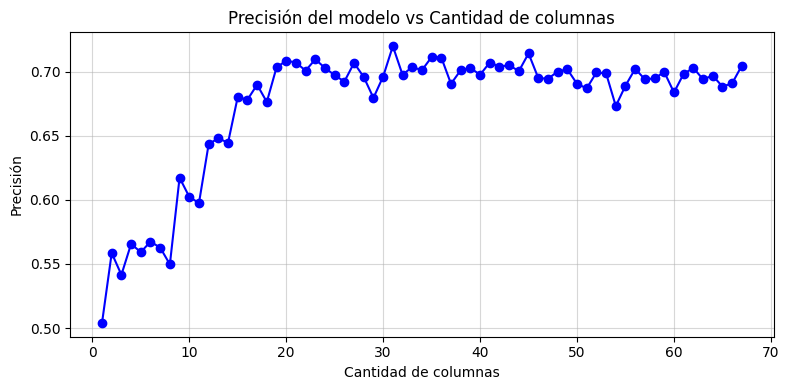

In [20]:
resultados_incrementales = []
# Obtener las columnas sin valores vacíos
columnas_sin_vacios = valores_vacios_str[valores_vacios_str == 0].index.tolist()
columnas_sin_vacios.remove('GRD')

# Ordenar las columnas restantes por cantidad de valores vacíos
columnas_con_vacios = valores_vacios_str[valores_vacios_str > 0].sort_values().index.tolist()

# Combinar las columnas en el orden deseado
columnas_ordenadas = columnas_sin_vacios + columnas_con_vacios

# Iterar sobre el número de columnas a incluir
for i in range(1, len(columnas_ordenadas) + 1):
    print(f"Entrenando modelo con {i} columnas...")
    columnas_seleccionadas = df[columnas_ordenadas[:i]].apply(LabelEncoder().fit_transform).values
    # Dividir los datos en entrenamiento y validación
    x_train_inc, x_val_inc, y_train_inc, y_val_inc = train_test_split(
        columnas_seleccionadas, Y, test_size=0.2, random_state=seed, stratify=Y
    )

    # Crear y entrenar el modelo
    modelo = Sequential()
    modelo.add(Embedding(input_dim=vocabulary, output_dim= 128))
    modelo.add(Flatten())
    modelo.add(Dense(32, activation="relu"))
    modelo.add(Dense(32, activation="relu"))
    modelo.add(Dense(32, activation="relu"))
    modelo.add(Dense(Y.shape[1], activation="softmax"))
    modelo.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    modelo.fit(x_train_inc, y_train_inc, epochs=16, batch_size=32, verbose=0)

    # Evaluar el modelo
    loss, accuracy = modelo.evaluate(x_val_inc, y_val_inc, verbose=0)
    resultados_incrementales.append({"columnas": i, "accuracy": accuracy})

# Mostrar los resultados
resultados_incrementales_df = pd.DataFrame(resultados_incrementales)
print(resultados_incrementales_df)



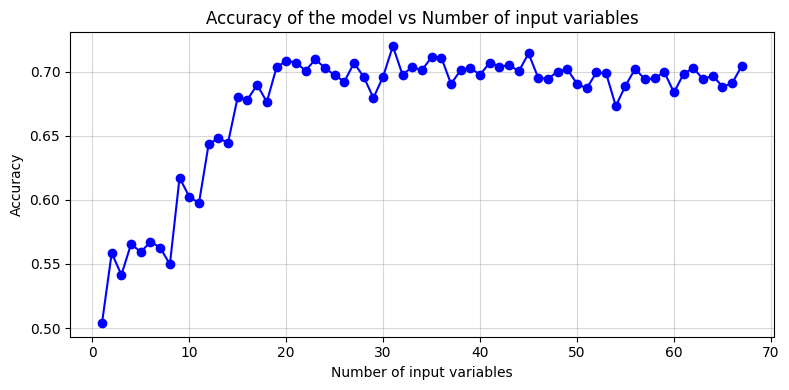

In [132]:
# Graficar los resultados
plt.figure(figsize=(8, 4))
plt.plot(resultados_incrementales_df["columnas"], resultados_incrementales_df["accuracy"], marker="o", color="blue")
plt.title("Accuracy of the model vs Number of input variables")
plt.xlabel("Number of input variables")
plt.ylabel("Accuracy")
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [147]:
print(resultados_incrementales_df.iloc[5])
print(resultados_incrementales_df.iloc[-1])
print(resultados_incrementales_df.iloc[30])

columnas    6.000000
accuracy    0.567386
Name: 5, dtype: float64
columnas    67.000000
accuracy     0.704634
Name: 66, dtype: float64
columnas    31.000000
accuracy     0.719844
Name: 30, dtype: float64


In [63]:
vocabulary = 10000

def build_model(hp):
    modelo = Sequential()
    modelo.add(Embedding(input_dim=vocabulary, output_dim=hp.Choice("embedding_dim", [8, 16, 32, 64, 128])))
    modelo.add(Flatten())
    modelo.add(Dense(64, activation="relu"))
    modelo.add(Dense(64, activation="relu"))
    modelo.add(Dense(64, activation="relu"))
    modelo.add(Dense(Y.shape[1], activation="softmax"))
    modelo.compile(
        loss="categorical_crossentropy",
        metrics=[tf.keras.metrics.CategoricalAccuracy(name="acc")],
        optimizer="adam"
    )
    return modelo

In [64]:
tuner=keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective=keras_tuner.Objective("val_acc",direction="max"),
    max_trials=32,
    executions_per_trial=1,
    overwrite=True,
    directory="modelos",
    project_name="reprobacion"
)

In [65]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
embedding_dim (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64, 128], 'ordered': True}


In [ ]:
len(y_train[0])

327

In [ ]:
# Se entrena con la cantidad de columnas óptima
x_train, x_val, y_train, y_val = train_test_split(X_optimo_encoded[:,:31], Y, test_size=0.2, stratify=Y, random_state=seed)

In [67]:
tuner.search(x_train,y_train,epochs=16,validation_data=(x_val,y_val),batch_size=32,verbose=1)

Trial 5 Complete [00h 00m 45s]
val_acc: 0.6827024817466736

Best val_acc So Far: 0.7251503467559814
Total elapsed time: 00h 05m 43s


In [68]:
mejor_modelo=tuner.get_best_models()[0]
mejor_modelo.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 31, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3968)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       254,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 327)            │        21,255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,563,591 (5.96 MB)

 Trainable params: 1,563,591 (5.96 MB)

 Non-trainable params: 0 (0.00 B)

In [70]:
y_pred_probs=mejor_modelo.predict(x_val)

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [33]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

import seaborn as sns
from sklearn.preprocessing import label_binarize

Rec=0.45 Acc=0.73 Pre=0.45


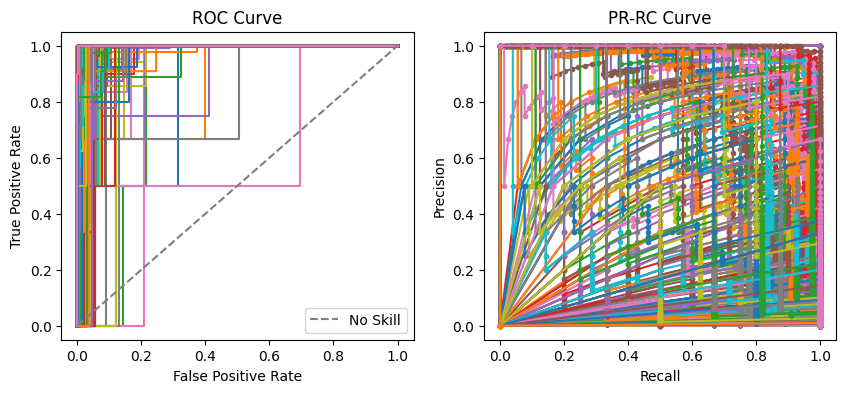

In [79]:
# Para multiclase, selecciona la clase con la mayor probabilidad
y_pred = np.argmax(y_pred_probs, axis=1)
y_val_classes = np.argmax(y_val, axis=1)  # Convertir one-hot encoding a clases


fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

roc_aucs = []

# # Matriz de confusión
# matriz = confusion_matrix(y_val_classes, y_pred)
# ax = axes[0]
# sns.heatmap(matriz, annot=True, ax=ax, cmap="Blues", fmt="d")
# ax.set_title("Rec=" + str(round(recall_score(y_val_classes, y_pred, average='macro'), 2)) +
#              " Acc=" + str(round(accuracy_score(y_val_classes, y_pred), 2)) +
#              " Pre=" + str(round(precision_score(y_val_classes, y_pred, average='macro'), 2)))
# axes[0].set_xlabel('Predicted')
# axes[0].set_ylabel('Real')

# ROC Curve (requiere binarización para multiclase)
y_val_binarized = label_binarize(y_val_classes, classes=range(len(np.unique(y_val_classes))))
fpr = {}
tpr = {}
roc_auc = {}
for i in range(y_val_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve para cada clase
for i in range(len(roc_auc)):
    axes[0].plot(fpr[i], tpr[i])#, label=f'Class {i} (area = {roc_auc[i]:0.2f})')
axes[0].plot([0, 1], [0, 1], '--', label='No Skill')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve')
axes[0].legend()

# Precision-Recall Curve
lr_precision = {}
lr_recall = {}
pr_auc = {}
for i in range(y_val_binarized.shape[1]):
    lr_precision[i], lr_recall[i], _ = precision_recall_curve(y_val_binarized[:, i], y_pred_probs[:, i])
    pr_auc[i] = auc(lr_recall[i], lr_precision[i])

# Plot Precision-Recall Curve para cada clase
for i in range(len(pr_auc)):
    axes[1].plot(lr_recall[i], lr_precision[i], marker='.')#, label=f'Class {i} (area = {pr_auc[i]:0.2f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('PR-RC Curve')

print("Rec=" + str(round(recall_score(y_val_classes, y_pred, average='macro',zero_division=0), 2)) +
              " Acc=" + str(round(accuracy_score(y_val_classes, y_pred), 2)) +
              " Pre=" + str(round(precision_score(y_val_classes, y_pred, average='macro',zero_division=0), 2)))


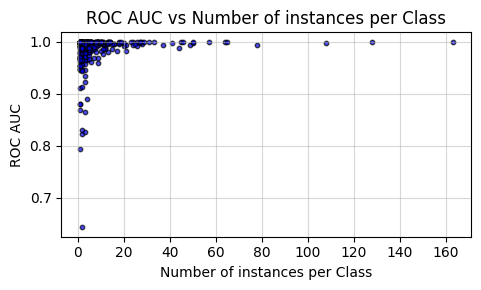

AUC Promedio: 0.9851
AUC Mediana:  0.9963


In [80]:
# Calcular la cantidad de instancias por clase
cantidad_instancias = np.sum(y_val_binarized, axis=0)

# Extraer los valores de roc_auc
roc_values = list(roc_auc.values())

# Crear el gráfico
plt.figure(figsize=(5, 3))
plt.scatter(cantidad_instancias, roc_values, color='blue', alpha=0.7, edgecolor='black', s=10)
plt.title('ROC AUC vs Number of instances per Class')
plt.xlabel('Number of instances per Class')
plt.ylabel('ROC AUC')
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()
print(f'AUC Promedio: {round(np.average(roc_values),4)}')
print(f'AUC Mediana:  {round(np.median(roc_values),4)}')